In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
#setting up file path
my_data_dir = 'C:\\Users\\ssroc\\cell_images\\cell_images'

In [4]:
os.listdir(my_data_dir) 

['test', 'train']

In [5]:
#test_path contains files used for testing the model
#train_path contains files used for training the model
test_path = my_data + '\\test\\'
train_path = my_data + '\\train\\'

In [6]:
os.listdir(test_path)

['parasitized', 'uninfected']

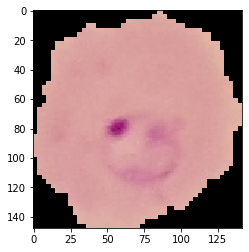

In [44]:
#example of extracting and displaying image
#image of infected
para_cell = train_path + 'parasitized\\' + os.listdir(train_path + 'parasitized')[0]
para_img = imread(para_cell)
plt.imshow(para_img)

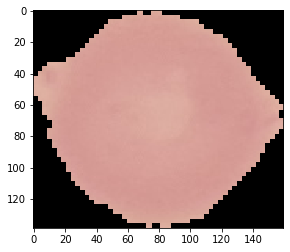

In [45]:
#image of uninfected
uninfected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
uninfected_cell = imread(uninfected_cell_path)
plt.imshow(uninfected_cell)

In [46]:
#extracting the dimensions of all test images
#dim1- x dimensions
#dim2- y dimensions
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [20]:
np.mean(dim1)

130.92538461538462

In [21]:
np.mean(dim2)

130.75

In [22]:
image_shape = (130,130,3)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
#used to randomize and modify images to better train the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

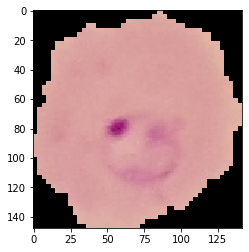

In [48]:
parasite_image = imread(para_cell)
#original image
plt.imshow(parasite_image)

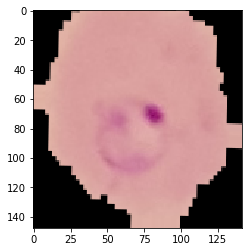

In [49]:
#modified image from image_gen
plt.imshow(image_gen.random_transform(parasite_image))

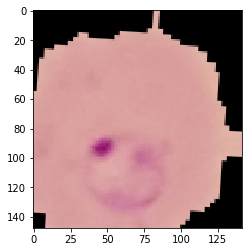

In [50]:
#another example of a randomized transform on an image 
plt.imshow(image_gen.random_transform(parasite_image))

In [51]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [52]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [53]:
#building the model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

model=Sequential()
#convolution layer with 32 filters, 3x3 kernel size, activation function-rectified linear unit
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
#convolution layer with 64 filters
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

#
model.add(Flatten())

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))




# Last layer of model. sigmoid activation function since this is a binary classification problem 
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
#early stopping to reduce possibility of overfitting
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [57]:
#passing in 16 images at a time
batch_size=16

In [58]:
#training image generator that feeds in the training images to the model
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [59]:
#test image generator
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [84]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 97s 62ms/step - loss: 0.4588 - accuracy: 0.8060 - val_loss: 0.3180 - val_accuracy: 0.9112
Epoch 2/20
1560/1560 [==============================] - 97s 62ms/step - loss: 0.2411 - accuracy: 0.9300 - val_loss: 0.1947 - val_accuracy: 0.9412
Epoch 3/20
1560/1560 [==============================] - 95s 61ms/step - loss: 0.2015 - accuracy: 0.9372 - val_loss: 0.1841 - val_accuracy: 0.9423
Epoch 4/20
1560/1560 [==============================] - 98s 63ms/step - loss: 0.1670 - accuracy: 0.9485 - val_loss: 0.1693 - val_accuracy: 0.9431
Epoch 5/20
1560/1560 [==============================] - 98s 63ms/step - loss: 0.1606 - accuracy: 0.9500 - val_loss: 0.1882 - val_accuracy: 0.9388
Epoch 6/20
1560/1560 [==============================] - 97s 62ms/step - loss: 0.1583 - accuracy: 0.9514 - val_loss: 0.1464 - val_accuracy: 0.9542
Epoch 7/20
1560/1560 [==============================] - 97s 62ms/step - loss: 0.1559 - accuracy: 0.9497 - val_loss: 0.1595 -

In [89]:
losses = pd.DataFrame(model.history.history)

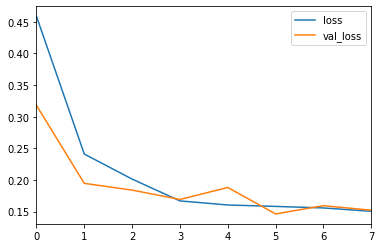

In [90]:
losses[['loss','val_loss']].plot()

In [42]:
model.metrics_names

['loss', 'accuracy']

In [97]:
from tensorflow.keras.preprocessing import image

In [115]:
pred_probabilities = model.predict_generator(test_image_gen)

In [117]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [118]:
predictions = pred_probabilities > 0.5

In [119]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [132]:
#loading in earlier image we had. we reshape it with target_size
my_image = image.load_img(para_cell,target_size=image_shape)

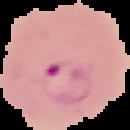

In [137]:
#image we will test
my_image

In [139]:
#converting image to an array
my_image = image.img_to_array(my_image)

In [142]:
type(my_image)

numpy.ndarray

In [143]:
my_image.shape

(130, 130, 3)

In [144]:
my_image = np.expand_dims(my_image, axis=0)

In [145]:
my_image.shape

(1, 130, 130, 3)

In [146]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [147]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}